In [45]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('./data/store.csv', delimiter=',', encoding='ISO-8859-1')

df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,City,State,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Status,Order.Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,4,TB-11280,Toby Braunhardt,1,Constantine,Constantine,...,2,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,1,4
1,22253,IN-2011-47883,1/1/2011,8/1/2011,4,JH-15985,Joseph Holt,1,Wagga Wagga,New South Wales,...,2,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,1,4
2,48883,HU-2011-1220,1/1/2011,5/1/2011,3,AT-735,Annie Thurman,1,Budapest,Budapest,...,2,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,1,2
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,3,EM-14140,Eugene Moren,3,Stockholm,Stockholm,...,2,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,1,2
4,22255,IN-2011-47883,1/1/2011,8/1/2011,4,JH-15985,Joseph Holt,1,Wagga Wagga,New South Wales,...,1,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,1,4


In [47]:
df.describe()

,Row.ID,Ship.Mode,Segment,Postal.Code,Category,Sales,Quantity,Discount,Profit,Shipping.Cost,Status,Order.Priority
count,51290.00000,51290.000000,51290.000000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.0,51290.000000
mean,25645.50000,3.254709,1.665139,55190.379428,2.005167,246.490581,3.476545,0.142908,28.610983,26.375915,1.0,3.118308
std,14806.29199,1.083110,0.766199,32063.693350,0.624701,487.565362,2.278766,0.212280,174.340972,57.296804,0.0,1.081088
min,1.00000,1.000000,1.000000,1040.000000,1.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,1.0,1.000000
25%,12823.25000,3.000000,1.000000,23223.000000,2.000000,30.758625,2.000000,0.000000,0.000000,2.610000,1.0,2.000000
50%,25645.50000,4.000000,1.000000,56430.500000,2.000000,85.053000,3.000000,0.000000,9.240000,7.790000,1.0,4.000000
75%,38467.75000,4.000000,2.000000,90008.000000,2.000000,251.053200,5.000000,0.200000,36.810000,24.450000,1.0,4.000000
max,51290.00000,4.000000,3.000000,99301.000000,3.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,1.0,4.000000


In [48]:
df_only_cardinal = df.drop(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Category', 'Sub.Category', 'Product.Name', 'Status', 'Order.Priority'], inplace=False, axis=1)
correlation_matrix = df_only_cardinal.corr('pearson')
correlation_matrix

,Sales,Quantity,Discount,Profit,Shipping.Cost
Sales,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping.Cost,0.768073,0.272649,-0.079056,0.354441,1.000000


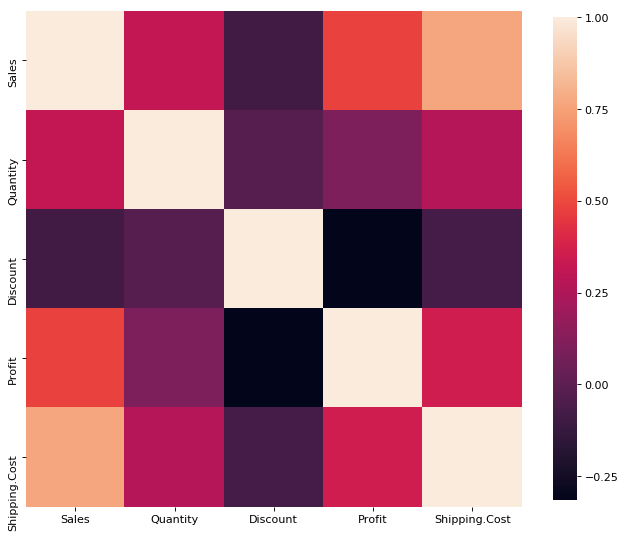

In [49]:
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sn.heatmap(correlation_matrix, annot=False, square=True, cbar_kws={"shrink": 0.8})
plt.savefig('./figures/correlation_matrix_heatmap_no_annot.png')
plt.show()

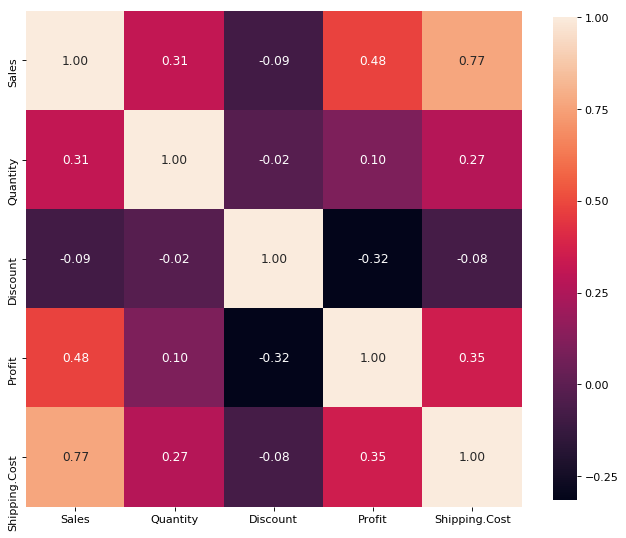

In [50]:
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sn.heatmap(correlation_matrix, annot=True, fmt='0.2f', square=True, annot_kws={"size": 11}, cbar_kws={"shrink": 0.8})
plt.savefig('./figures/correlation_matrix_heatmap_annot.png')
plt.show()

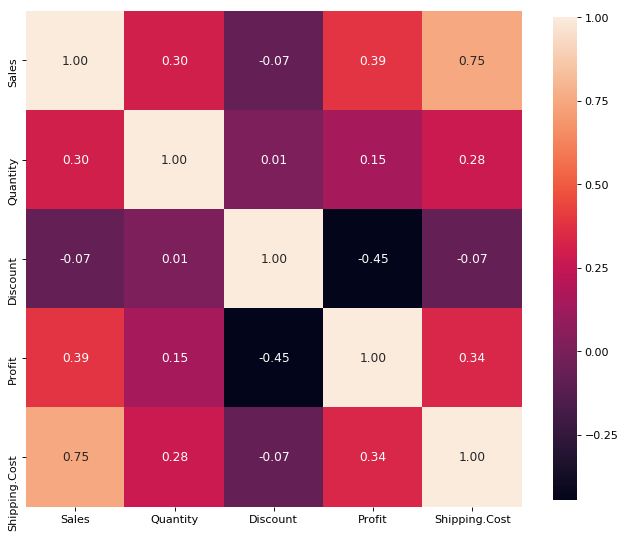

In [51]:
correlation_matrix = df_only_cardinal.corr('kendall')

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sn.heatmap(correlation_matrix, annot=True, fmt='0.2f', square=True, annot_kws={"size": 11}, cbar_kws={"shrink": 0.8})
plt.savefig('./figures/correlation_matrix_heatmap_kendall.png')
plt.show()

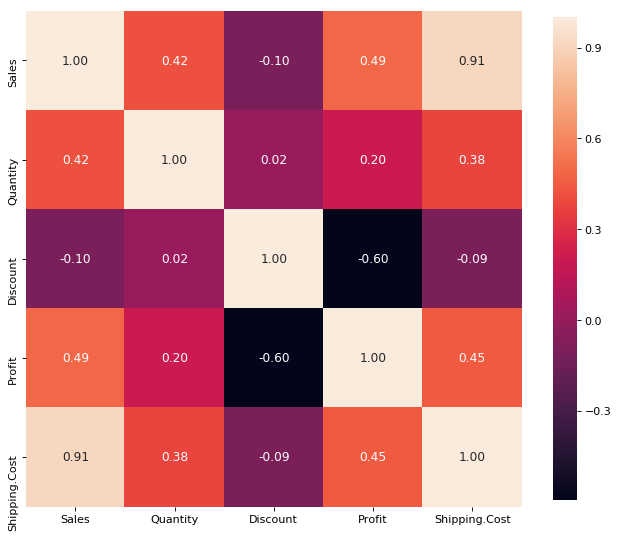

In [52]:
correlation_matrix = df_only_cardinal.corr('spearman')

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sn.heatmap(correlation_matrix, annot=True, fmt='0.2f', square=True, annot_kws={"size": 11}, cbar_kws={"shrink": 0.8})
plt.savefig('./figures/correlation_matrix_heatmap_spearman.png')
plt.show()